# Welcome to Machine Learning Assignment 2

## Setup

In [1]:
import numpy as np
import pandas as pd
import io
import os
import IPython
from pycaret.regression import * 
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pickle
import seaborn as sns
import sklearn
import tarfile
import urllib.request
import matplotlib as mpl
import matplotlib.pyplot as plt
import requests
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from zlib import crc32

## Importing the data

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

## Visualisation 
Quick glimpse at the data

In [3]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [5]:
#check range of runtime (in days)
train.runtime.min(), train.runtime.max()

(0.0, 338.0)

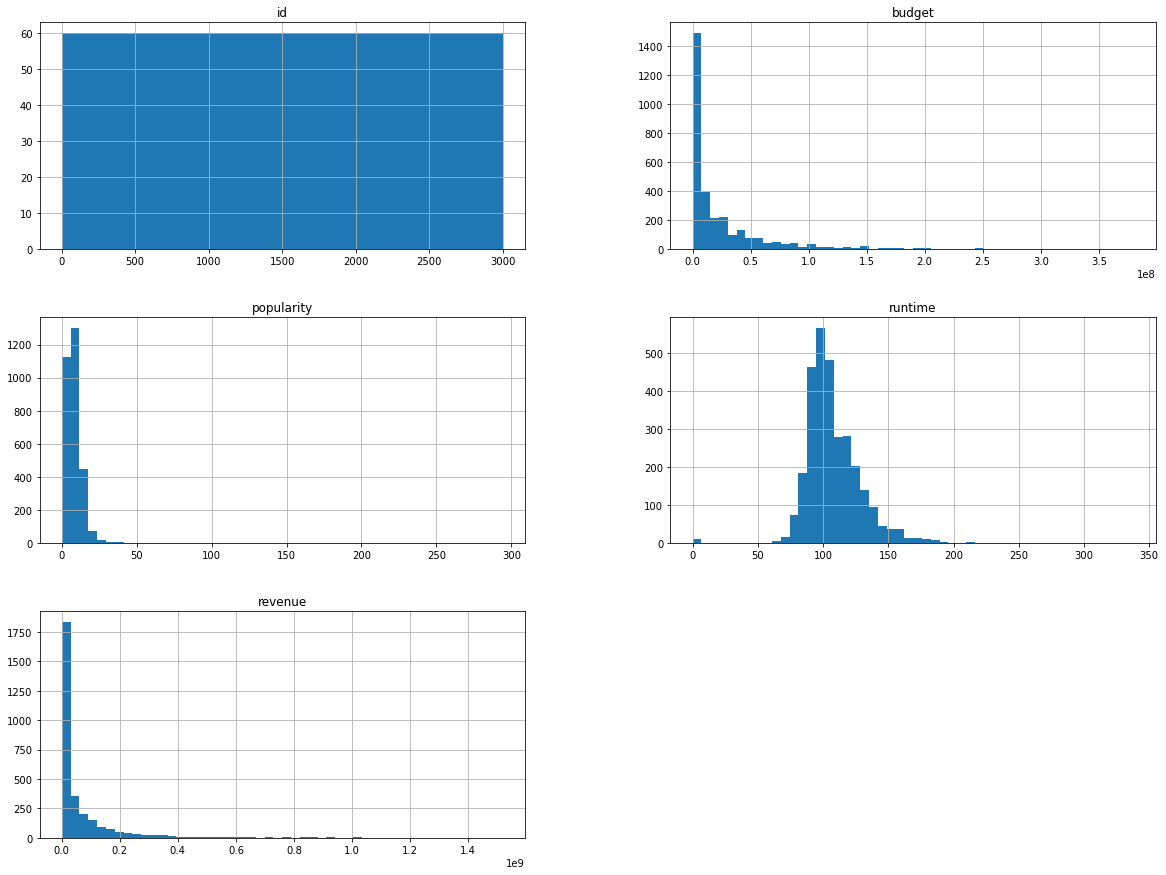

In [6]:
%matplotlib inline
train.hist(bins=50, figsize=(20,15))
plt.show()
#We see that a big part of our budget is zero so we'll have to fix that later

In [7]:
%matplotlib inline
#test.hist(bins=50, figsize=(20,15))
#plt.show()

We create a new attribute popularity per day, which gives the average of the popularity each day.

In [8]:
#Correlation matrix for the attributes we are using
corr_matrix = train.corr()
corr_matrix["revenue"].sort_values(ascending=False)

revenue       1.000000
budget        0.752965
popularity    0.461460
runtime       0.216380
id            0.000610
Name: revenue, dtype: float64

In [9]:
#These are the attributes we are currently working with
attributes = ["budget", "runtime", "popularity", "revenue"]
train = train[attributes]
train = train.dropna()
train_labels = train["revenue"].copy()
train = train.drop("revenue", axis=1)

<AxesSubplot:>

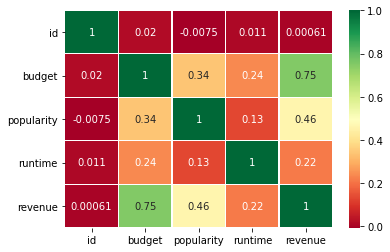

In [10]:
sns.heatmap(corr_matrix, annot=True,cmap='RdYlGn',linewidths=0.2)

## Prepare data for Algorithm

In [11]:
#Drop rows who are NaN
train = train.dropna()

#### Filling in 0 values - Budget

In [12]:
#Function for filling in the values
def budget_fill(df, median_budget):
    df.loc[df.budget == 0, 'budget'] = median_budget
    return df

In [13]:
#Get the median budget but without the 0 values, this would change the value drastically
median_budget = train[train['budget'] > 0]['budget'].median()

#Fill the 0 values with median values
train = budget_fill(train, median_budget)

### Data Cleaning

In [14]:
#Feature scale the data, before feeding it to the algorithm
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)

In [15]:
train_ready = pd.DataFrame(train, columns=['budget', 'runtime', 'popularity'])
train_ready.head(20)

,budget,runtime,popularity
0,14000000,93.0,6.575393
1,40000000,113.0,8.248895
2,3300000,105.0,64.299990
3,1200000,122.0,3.174936
4,16000000,118.0,1.148070
5,8000000,83.0,0.743274
6,14000000,92.0,7.286477
7,16000000,84.0,1.949044
8,16000000,100.0,6.902423
9,6000000,91.0,4.672036


## Random forest algorithm

#### Setup for evaluation

In [16]:
#get the rmse from the trained model
def rmse(y_pred,y_true):
    return np.sqrt(mean_squared_error(y_pred, y_true))
def print_scores(model):
    print(f'Score Train R2: {model.score(X_train,y_train)}')
    print(f'RMSE Train R2: {rmse(model.predict(X_train), y_train)}')

In [17]:
#Setup for Random forest
seed = 42
np.random.seed(seed)

In [18]:
#Split the dataset
X_train, X_valid, y_train, y_valid = train_test_split(
    train_ready,train_labels, 
    test_size=0.1, 
    random_state=42
)

In [19]:
#Create the model
#With a 80 different trees, 4 minimum samples required to be at a leaf node
#With the use of Out of bag samples to estimate the generalization score 
rf = RandomForestRegressor(n_estimators = 80, min_samples_leaf = 4, oob_score = True, random_state = 42)

In [20]:
#actually training the algorithm
rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=4, n_estimators=80, oob_score=True,
                      random_state=42)

In [21]:
print_scores(rf)
print("\nExample with random values:")
format_result = "€{:,.2f}".format(float(rf.predict([[10000000,80.0,3]])))
print(format_result)

Score Train R2: 0.8085749821417169
RMSE Train R2: 61173403.25779327

Example with random values:
€9,577,552.95


## Export model

In [22]:
pickle.dump(rf, open('../model/box_office_model.pkl', 'wb'))